## USED CAR PRICE PREDICTION MODEL

## By - Shankar Wagh

### Problem Defination

This is the first sep of machine learning life cycle. Here we analyse what kind of problem is and how to solve it.
So far this project to find the used car price based on some features, thats why we are using a car dataset, where we want to predict the selling price of car based  on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem.
We will be using regression machine learning algorithms to solve this problem.

In [1]:
# Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Gathering

In [2]:
# I have downloaded the dataset and saved in our project folder.
dataset = pd.read_csv('car_dataset.csv')

# print first five rows of the dataset
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preparation

In [3]:
# Checking the number of rows and columns in dataset
print('Rows in the dataset: ',dataset.shape[0])
print('columns in the dataset: ',dataset.shape[1])

Rows in the dataset:  301
columns in the dataset:  9


In [4]:
#Checking the data type of columns.
#This step is important because sometimes dataset may contain wrong datatype of the feature.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


__Good! every data type is correctly mentioned. We need not to make any changes.__

In [5]:
#check statistical summary of all the columns with numerical values.
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# Check the Statistical summar of all the columns with numerical values
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
#check if there is any missing value in the dataset
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

__There are no missing values in the dataset__

# Visualization

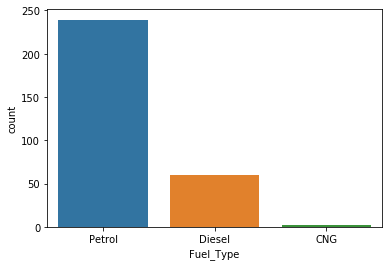

In [8]:
sns.countplot(dataset['Fuel_Type'])

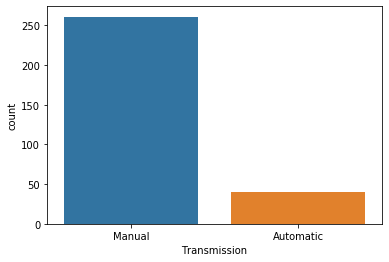

In [9]:
sns.countplot(dataset['Transmission'])

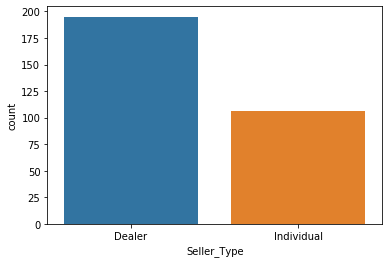

In [10]:
sns.countplot(dataset['Seller_Type'])

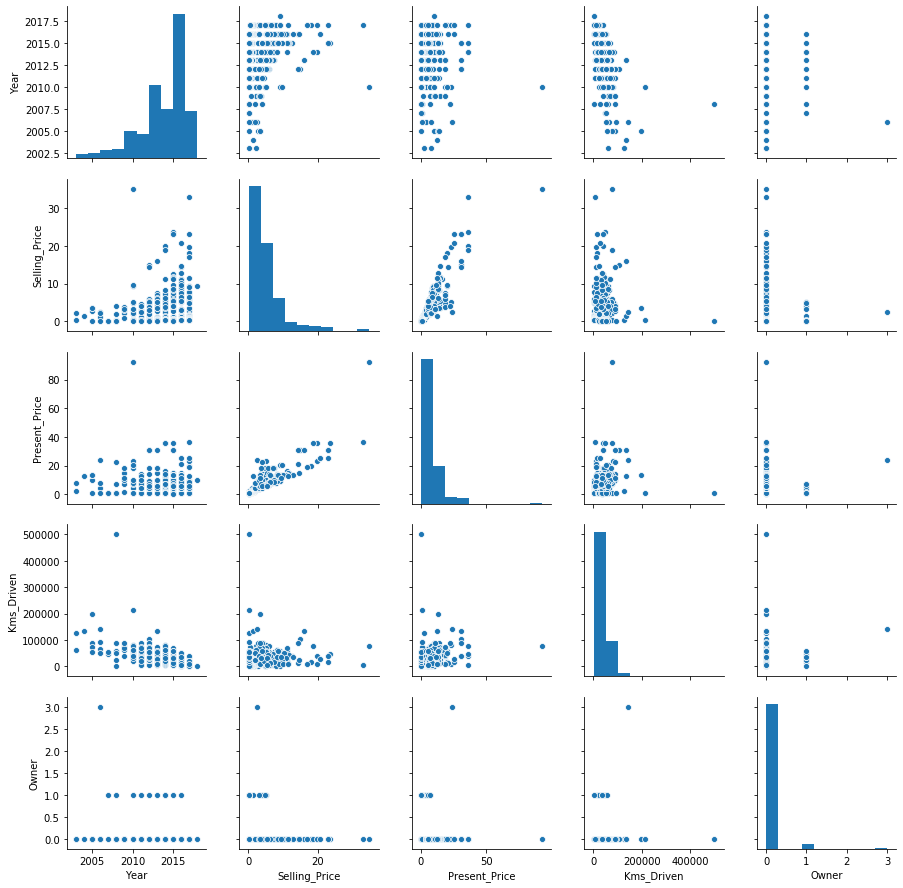

In [11]:
sns.pairplot(dataset)

# Feature Engineering

In [12]:
# Adding a column with the current year
dataset['Current_Year'] = 2020
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [13]:
#creating a new column which will be age of vehicles; new feature
dataset['Vehicle_Age']=dataset['Current_Year'] - dataset['Year']
dataset.head(5)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [14]:
# Getting dummies for the columns which are categorical using get_dummies
dataset = pd.get_dummies(dataset, columns=['Fuel_Type','Transmission','Seller_Type'],drop_first = True)
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,ritz,2014,3.35,5.59,27000,0,2020,6,0,1,1,0
1,sx4,2013,4.75,9.54,43000,0,2020,7,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,2020,3,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,0,2020,9,0,1,1,0
4,swift,2014,4.60,6.87,42450,0,2020,6,1,0,1,0


In [15]:
# Dropping the columns which are redundant and irrelevant
dataset.drop(columns = ['Car_Name', 'Year','Current_Year'], inplace = True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,3.35,5.59,27000,0,6,0,1,1,0
1,4.75,9.54,43000,0,7,1,0,1,0
2,7.25,9.85,6900,0,3,0,1,1,0
3,2.85,4.15,5200,0,9,0,1,1,0
4,4.60,6.87,42450,0,6,1,0,1,0


Fuel_Type feature:
    1. Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1
    2. Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0
    3. Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0

Transmission feature:
    1. transmission is manual if Transmission_Manual = 1
    2. transmission is automatic if Transmission_Manual = 0
Seller_Type feature:
    1. Seller_Type is Individual if Seller_Type_Individual = 1
    2. Seller_Type is dealer if Seller_Type_Individual = 0
    

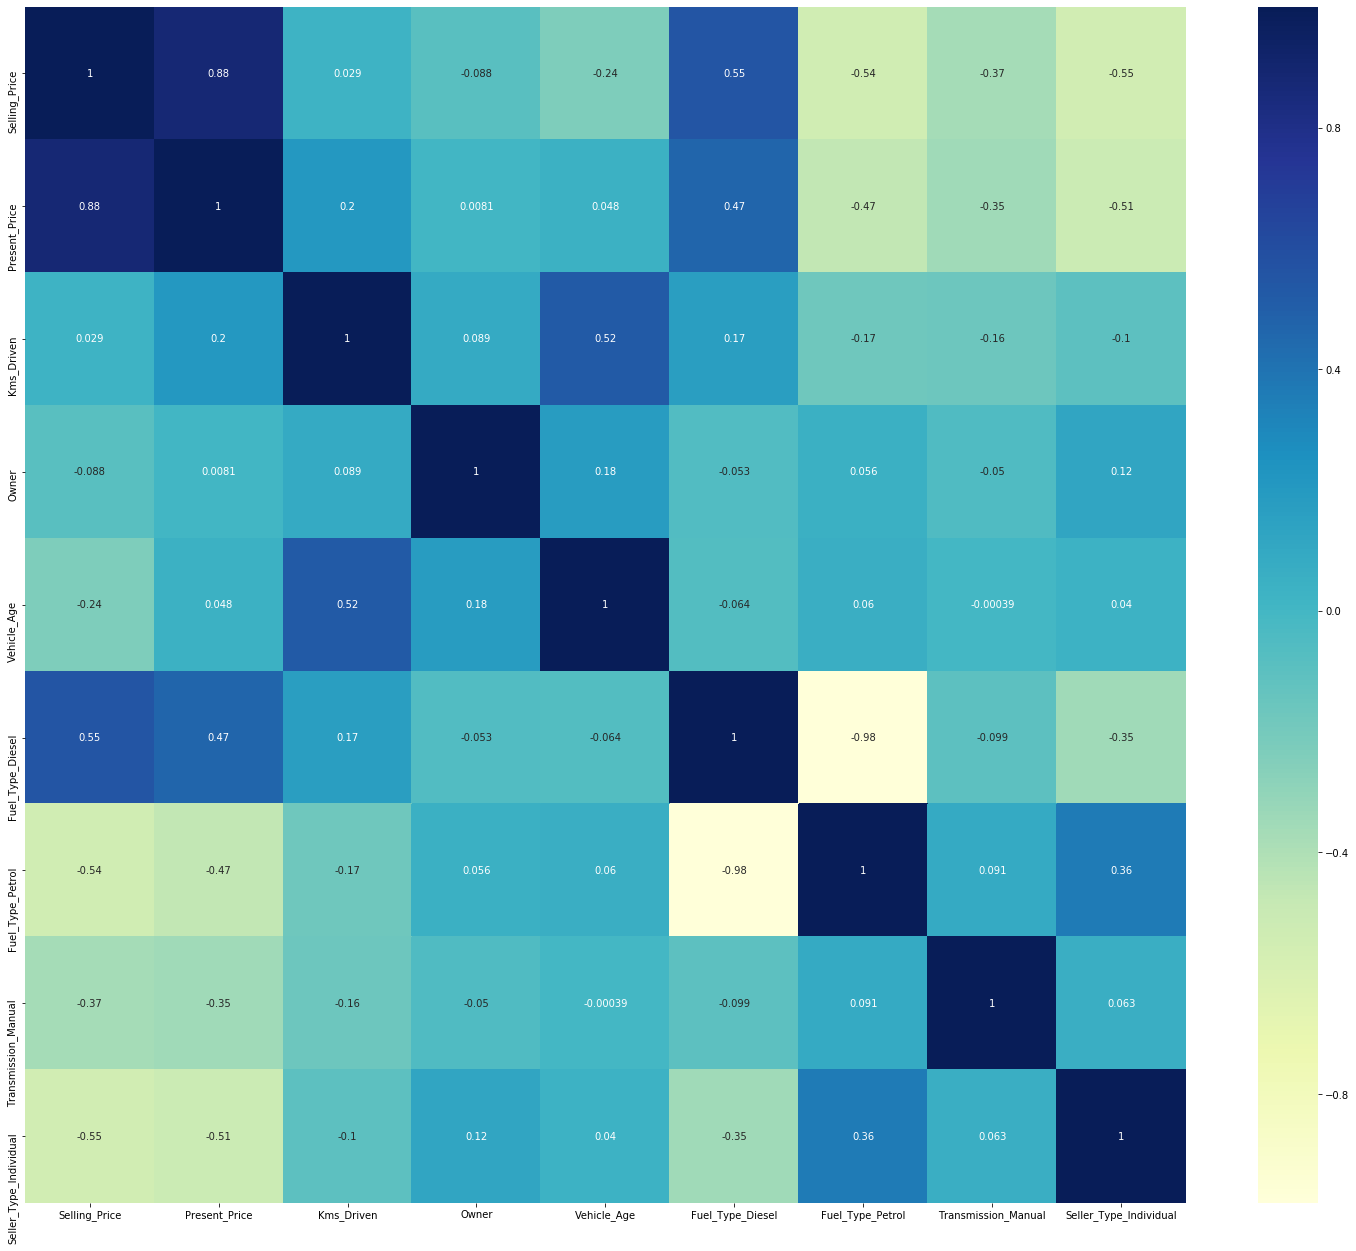

In [16]:
#create correlation matrix
correlations = dataset.corr()
indx=correlations.index

#plot this correlation for clear visualisation
plt.figure(figsize=(26,22))
#annot = True , dsiplays text over the cells.
#cmap = "YlGnBu" is nothing but adjustment of colors for our heatmap
sns.heatmap(dataset[indx].corr(),annot=True,cmap="YlGnBu")
#amount of darkness shows how our features are correalated with each other 


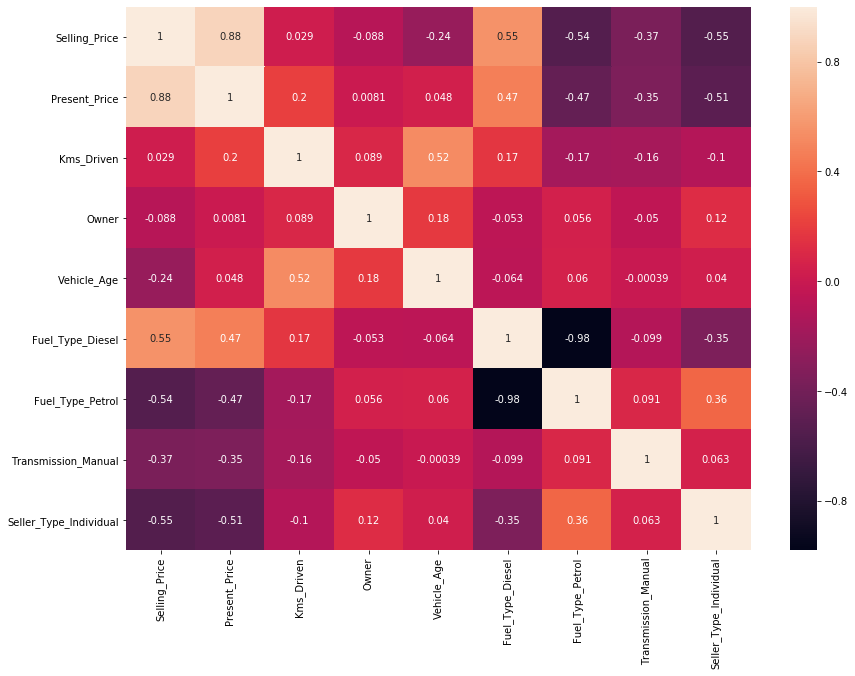

In [18]:
# Create correlation matrix
plt.figure(figsize = (14,10))
cormat = dataset.corr()
sns.heatmap(cormat, annot = True)

## Features and target Variable

In [19]:
# taking all the features except "selling price"
X=dataset.iloc[:,1:]
# taking "selling price" as y , as it is our target variable
y=dataset.iloc[:,0]

In [20]:
X.head()

,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,5.59,27000,0,6,0,1,1,0
1,9.54,43000,0,7,1,0,1,0
2,9.85,6900,0,3,0,1,1,0
3,4.15,5200,0,9,0,1,1,0
4,6.87,42450,0,6,1,0,1,0


In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## Feature Importance

In [23]:
# Checking and compairing the important of features
from sklearn.ensemble import ExtraTreesRegressor
# create model instance
model = ExtraTreesRegressor()
# fit the model
model.fit(X,y)
print(model.feature_importances_)

[4.81217366e-01 4.72247720e-02 3.40268608e-04 8.04621958e-02
 1.90327382e-01 1.51314020e-02 9.01134109e-02 9.51832023e-02]


C:\Users\Shankar Wagh SNR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


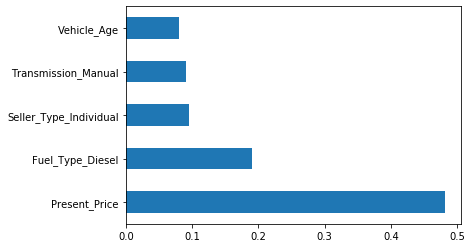

In [24]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index  =X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.show()

## Splitting Data in Training and Testing

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 13)

In [ ]:
# Fitting and evaluating different models
Here I am using three models :
1. Linear Regression
2. Decision Tree
3. Random forest Regressor

I will fit these models and then choose one with the better accuracy.
You can use any regression model as per your choice.

# Fitting And Evaluating Different Model
Here I am using Three Model
1. Linear Regression
2. Decision Tree
3. Random Forest Regressor

I wiil fit these three models and then choose one with the better accuracy

## Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
# Create model instance
reg_model = LinearRegression()
# fitting the linear regresiion model
reg_model.fit(X_train,y_train)

# Predict on the test Data
y_pred = reg_model.predict(X_test)

# Evaluation Metrics
from sklearn import metrics
# Print Mean Absolute Error
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
# Print Mean Squarred Error
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
# print root mean squarred error
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# print R2 score
R2 = metrics.r2_score(y_test, y_pred)
print('R2 Score: ', R2)

MAE:  1.3229036188525354
MSE:  3.6134159665444026
RMSE:  1.9008987260094639
R2 Score:  0.85414355469603


## Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeRegressor
# Create model instance
DT_model = DecisionTreeRegressor()
# fitting the Decision Tree regresor model
DT_model.fit(X_train,y_train)

# Predict on the test Data
y_pred = DT_model.predict(X_test)

# Evaluation Metrics
from sklearn import metrics
# Print Mean Absolute Error
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
# Print Mean Squarred Error
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
# print root mean squarred error
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# print R2 score
R2 = metrics.r2_score(y_test, y_pred)
print('R2 Score: ', R2)

MAE:  0.6585245901639344
MSE:  1.3398573770491806
RMSE:  1.1575220849077483
R2 Score:  0.9459163196155393


## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestRegressor
# Create model instance
rand_model = RandomForestRegressor()
# fitting the Decision Tree regresor model
rand_model.fit(X_train,y_train)

# Predict on the test Data
y_pred = rand_model.predict(X_test)

# Evaluation Metrics
from sklearn import metrics
# Print Mean Absolute Error
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
# Print Mean Squarred Error
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
# print root mean squarred error
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# print R2 score
R2 = metrics.r2_score(y_test, y_pred)
print('R2 Score: ', R2)

MAE:  0.5811311475409836
MSE:  1.0184836229508194
RMSE:  1.009199496111061
R2 Score:  0.9588886521177412


C:\Users\Shankar Wagh SNR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### We want our R2 score to be maximum and other errors to be minimum for better results

### Random forest regressor is giving better results. therefore we will hypertune this model and then fit, predict.

# Hyperparamter tuning

In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Number of tree in the random forest
n_estimator = [int(x) for x in np.linspace(100,800,8)]

# Number of feature to consider at every split
max_features = ['auto','sqrt']

# maximum number of level in tree
max_depth = [int(x) for x in np.linspace(5,30,6)]

# minimum number of sample required to split a node
min_sample_split = [2,5,10,15,70]

# minimun number of sample required at each leaf
min_sample_leaf = [1,2,10]


In [30]:
# Creat the random grid
random_grid = {'n_estimators': n_estimator,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_sample_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 70], 'min_samples_leaf': [1, 2, 10]}


In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [32]:
# Random Search of Parameter, using 3 cross validation fold
rf_model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,cv = 5,random_state = 0)

In [33]:
# fitting the model
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...s

In [35]:
# displaying the best parameter
rf_model.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [36]:
rf_model.best_score_

0.8623554509271583

## Final Prediction

In [37]:
#predicting against test data
y_pred=rf_model.predict(X_test)
#print the erros
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.7759639187068449
MSE: 1.776815921175468
RMSE: 1.3329725883061017
R2: 0.9282783779610091


## Save The Model

In [38]:
import joblib
joblib.dump(rf_model,'finalized_car_model_new.pkl')

['finalized_car_model_new.pkl']

In [43]:
model = joblib.load('finalized_car_model.pkl')


In [ ]:
model.predict([])